<a href="https://colab.research.google.com/github/ShreyWey/Demo-Day-Project/blob/main/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import ipywidgets as widgets
from IPython.display import display
import datetime
import yfinance as yf

# Create input fields
company_name = widgets.Text(description="Company Name:", placeholder="Enter company ticker")
start_date = widgets.DatePicker(description='Start Date:', value=datetime.date.today())
end_date = widgets.DatePicker(description='End Date:', value=datetime.date.today())

# Button to submit data
submit_button = widgets.Button(description="Submit")

# Display the inputs
display(company_name, start_date, end_date, submit_button)

# Function to handle button click
def on_button_click(b):
    # Get values from the widgets
    company = company_name.value
    start = start_date.value.strftime('%Y-%m-%d')  # Convert to 'YYYY-MM-DD' string format
    end = end_date.value.strftime('%Y-%m-%d')      # Convert to 'YYYY-MM-DD' string format

    print(f"Fetching data for {company} from {start} to {end}...")

    # Download stock data using the yfinance library
    stock_data = yf.download(company, start=start, end=end)

# Link the button to the function
submit_button.on_click(on_button_click)


Text(value='', description='Company Name:', placeholder='Enter company ticker')

DatePicker(value=datetime.date(2024, 9, 13), description='Start Date:')

DatePicker(value=datetime.date(2024, 9, 13), description='End Date:')

Button(description='Submit', style=ButtonStyle())

Fetching data for MSFT from 2017-02-15 to 2024-09-13...


[*********************100%***********************]  1 of 1 completed


In [43]:
import yfinance as yf

stock_data = yf.download(company_name.value, start_date.value, end_date.value)
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-15,64.500000,64.570000,64.160004,64.529999,58.954174,17005200
2017-02-16,64.739998,65.239998,64.440002,64.519997,58.945026,20546300
2017-02-17,64.470001,64.690002,64.300003,64.620003,59.036392,21248800
2017-02-21,64.610001,64.949997,64.449997,64.489998,58.917622,20655900
2017-02-22,64.330002,64.389999,64.050003,64.360001,58.798859,19292700
...,...,...,...,...,...,...
2024-09-06,409.059998,410.649994,400.799988,401.700012,401.700012,19609500
2024-09-09,407.239990,408.649994,402.149994,405.720001,405.720001,15295100
2024-09-10,408.200012,416.329987,407.700012,414.200012,414.200012,19594300


In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1,1))

In [45]:
import numpy as np

def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [46]:
time_step = 100
X, y = create_dataset(scaled_data, time_step)

train_size=0.8
X_train, X_test = X[:int(X.shape[0]*train_size)], X[int(X.shape[0]*train_size):]
y_train, y_test = y[:int(y.shape[0]*train_size)], y[int(y.shape[0]*train_size):]

In [47]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=64))
model.add(Dense(units=64))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - loss: 0.0365
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0018
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 5.3640e-04
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 3.6167e-04
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 3.7507e-04
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 3.5532e-04
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 4.0395e-04
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - loss: 3.3184e-04
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 3.4989e-04
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 3.6053e-04


In [49]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0011
Test Loss: 0.0014820584328845143


In [50]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [51]:
original_data = stock_data['Close'].values
predicted_data = np.empty_like(original_data)
predicted_data[:] = np.nan
predicted_data[-len(predictions):] = predictions.reshape(-1)

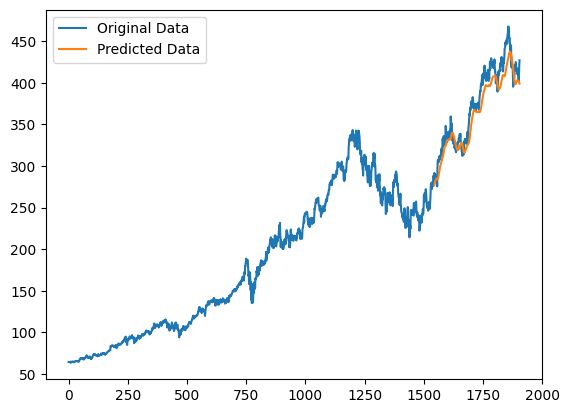

In [52]:
import matplotlib.pyplot as plt

plt.plot(original_data, label='Original Data')
plt.plot(predicted_data, label='Predicted Data')
plt.legend()
plt.show()

In [53]:
new_predictions = model.predict(X_test[-90:])
new_predictions = scaler.inverse_transform(new_predictions)

predicted_data = np.append(predicted_data, new_predictions)
predicted_data[-90:]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([392.70864868, 391.98132324, 391.89785767, 392.06060791,
       392.4390564 , 393.01312256, 393.78527832, 394.60736084,
       395.54293823, 396.76794434, 398.02996826, 399.23379517,
       400.55325317, 402.02627563, 403.58532715, 404.9864502 ,
       406.35577393, 407.64065552, 408.76559448, 409.15515137,
       409.09469604, 408.67132568, 408.13201904, 407.85220337,
       407.75799561, 407.7638855 , 407.99951172, 408.56048584,
       409.63589478, 411.00418091, 412.54370117, 414.35601807,
       416.17123413, 417.88623047, 419.62091064, 421.19537354,
       422.72821045, 424.20327759, 425.59747314, 426.63983154,
       427.80535889, 429.07351685, 430.40472412, 431.98092651,
       433.5770874 , 434.85498047, 436.14703369, 436.91720581,
       437.29516602, 437.4152832 , 437.18353271, 436.50518799,
       435.45358276, 434.08108521, 432.79656982, 431.68740845,
       430.10739136, 427.91116333, 425.70407104, 423.62683105,
       421.57229614, 419.45120239, 417.34210205, 414.99

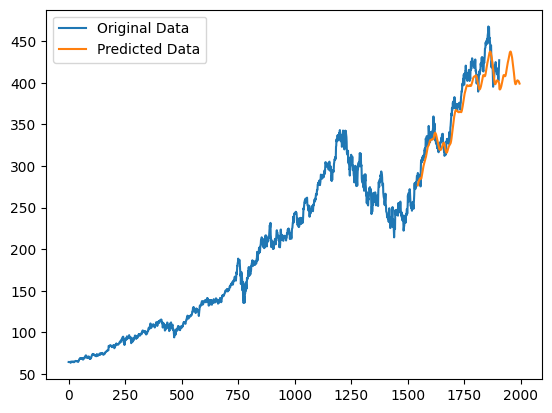

In [54]:
plt.plot(original_data, label='Original Data')
plt.plot(predicted_data, label='Predicted Data')
plt.legend()
plt.show()